In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv('netflix_titles.csv', low_memory=False)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
# Getting the total null values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [16]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [17]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

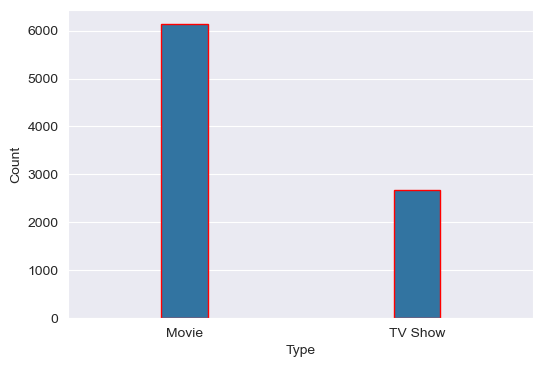

In [22]:
# Comparison between movies and tv shows
n_shows = df[df['type'] == 'TV Show']
n_movies = df[df['type'] == 'Movie']
plt.figure(figsize = (6, 4), dpi = 100)
ax = sns.countplot(x='type', data=df, width=0.2, edgecolor='red')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

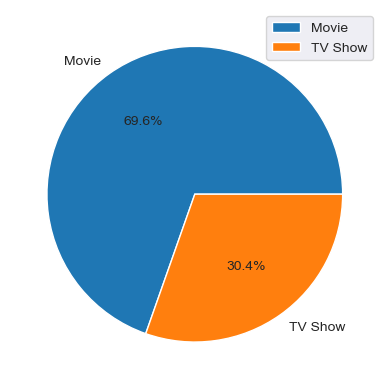

In [25]:
# Percent distribution
ng_type = df['type'].value_counts().reset_index()
# ng_type = ng_type.rename(columns={'type':'count', 'index':'type'})
plt.pie(ng_type['count'], labels = ng_type['type'], autopct='%1.1f%%')
plt.legend()
plt.show()

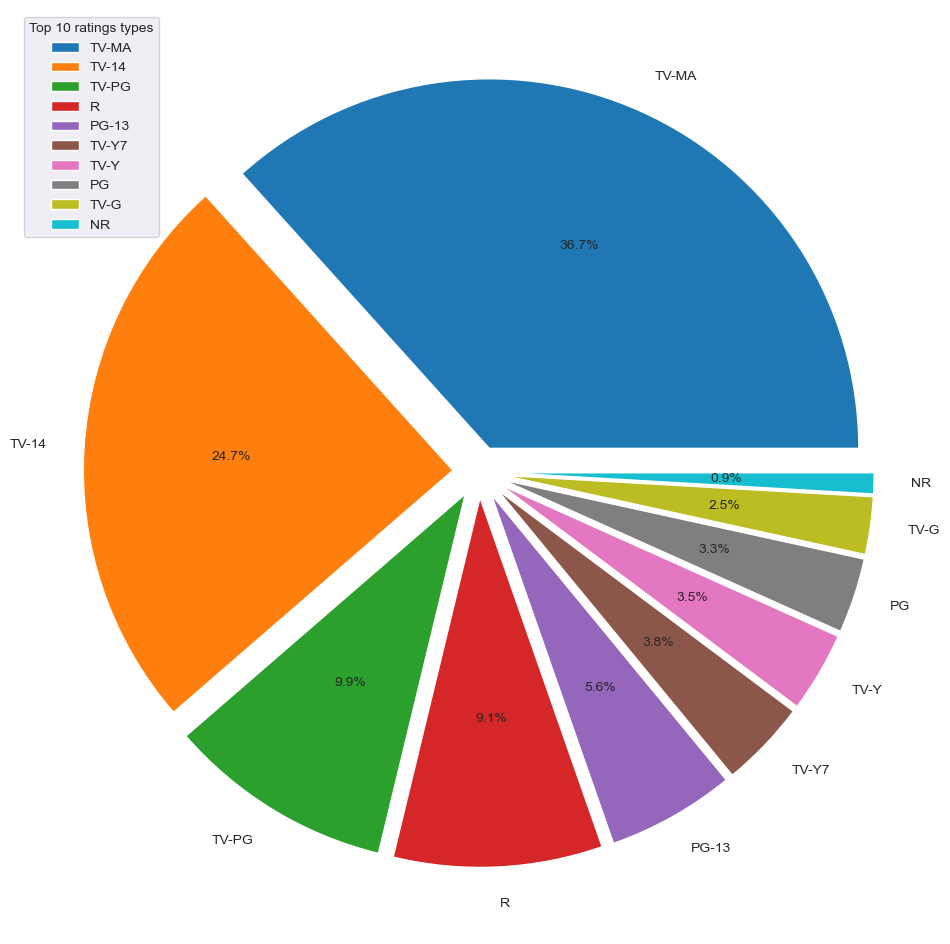

In [32]:
# Distribution of Ratings
p_ratings = df['rating'].value_counts().head(10)
plt.figure(figsize=(18,12), dpi = 100)
plt.pie(x=p_ratings, labels=p_ratings.index, autopct='%1.1f%%', explode=[0.07 for i in p_ratings.index])
plt.legend(loc='upper left', title='Top 10 ratings types')
plt.show()

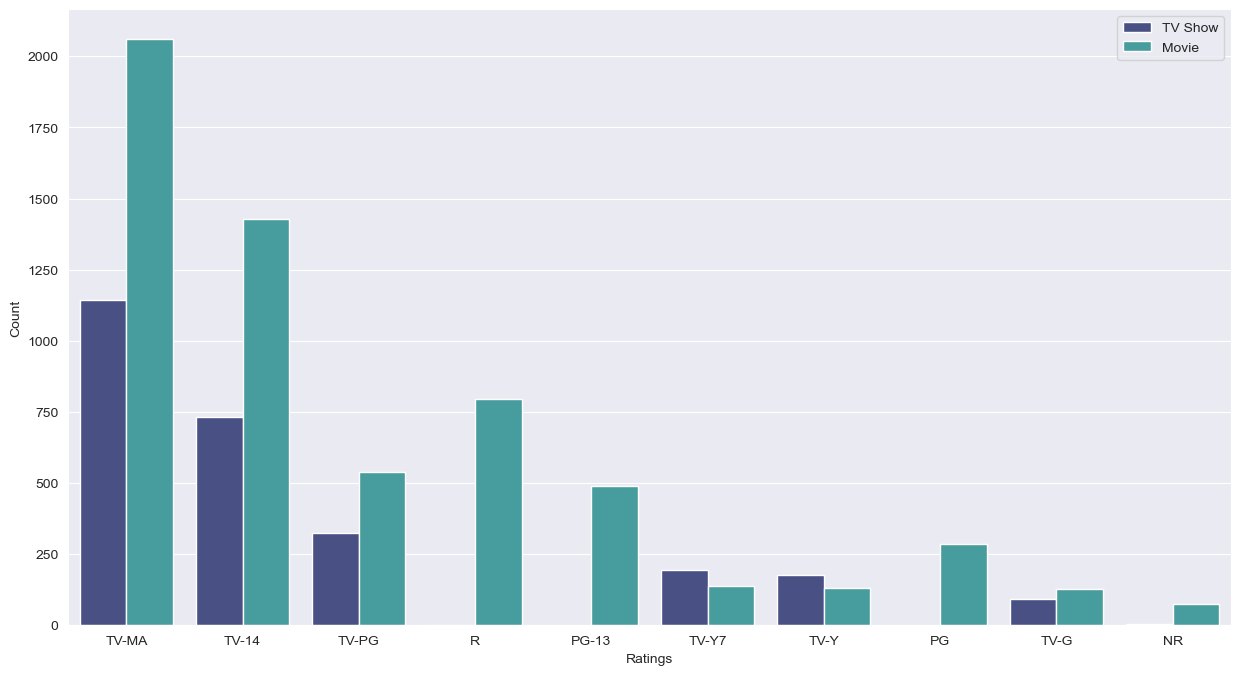

In [35]:
# Ratings Analysis
plt.figure(figsize=(15,8), dpi = 100)
sns.countplot(x='rating',data=df, hue='type', hue_order=['TV Show', 'Movie'], order=df['rating'].value_counts().index[0:10], palette='mako')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.legend()
plt.show()

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_2518/542949067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=n_movies, palette='mako', order=n_movies['rating'].value_counts().index[0:10],


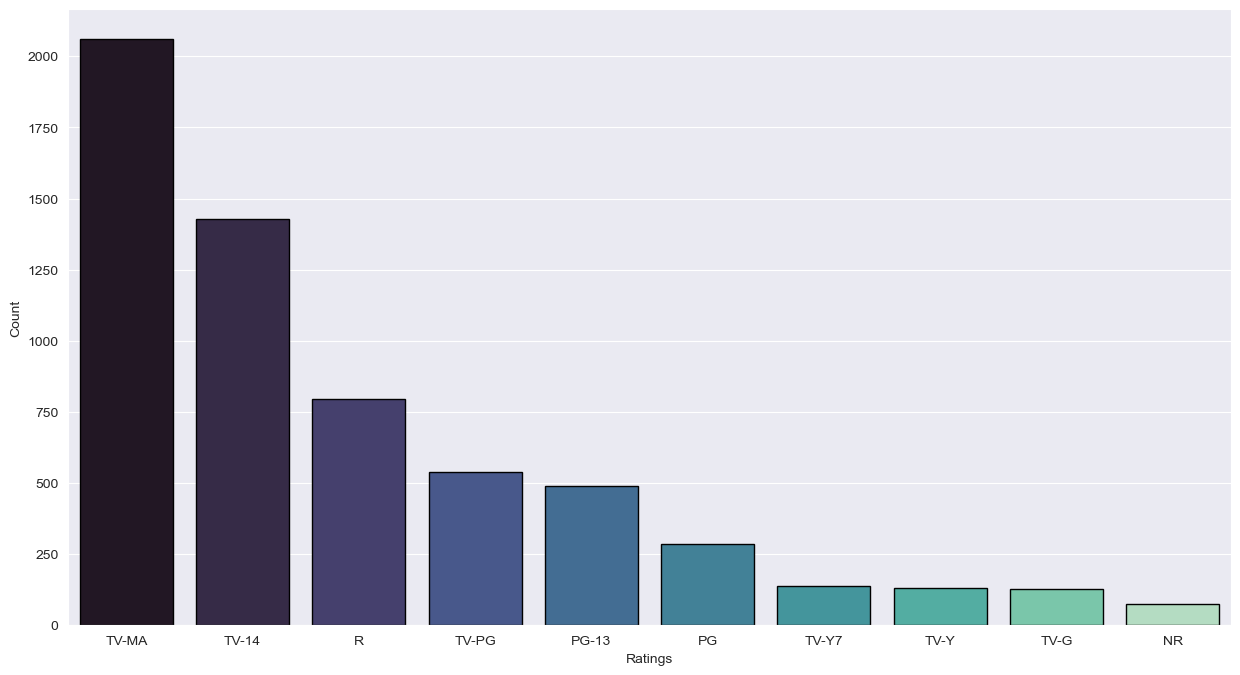

In [38]:
# Movie ratings analysis
plt.figure(figsize=(15,8), dpi = 100)
sns.countplot(x='rating', data=n_movies, palette='mako', order=n_movies['rating'].value_counts().index[0:10],
              edgecolor='black',)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

/var/folders/j0/tr2332417vjbmj74tfc0dcd40000gn/T/ipykernel_2518/4272519347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=n_shows, palette='mako', order=n_shows['rating'].value_counts().index[0:10],)


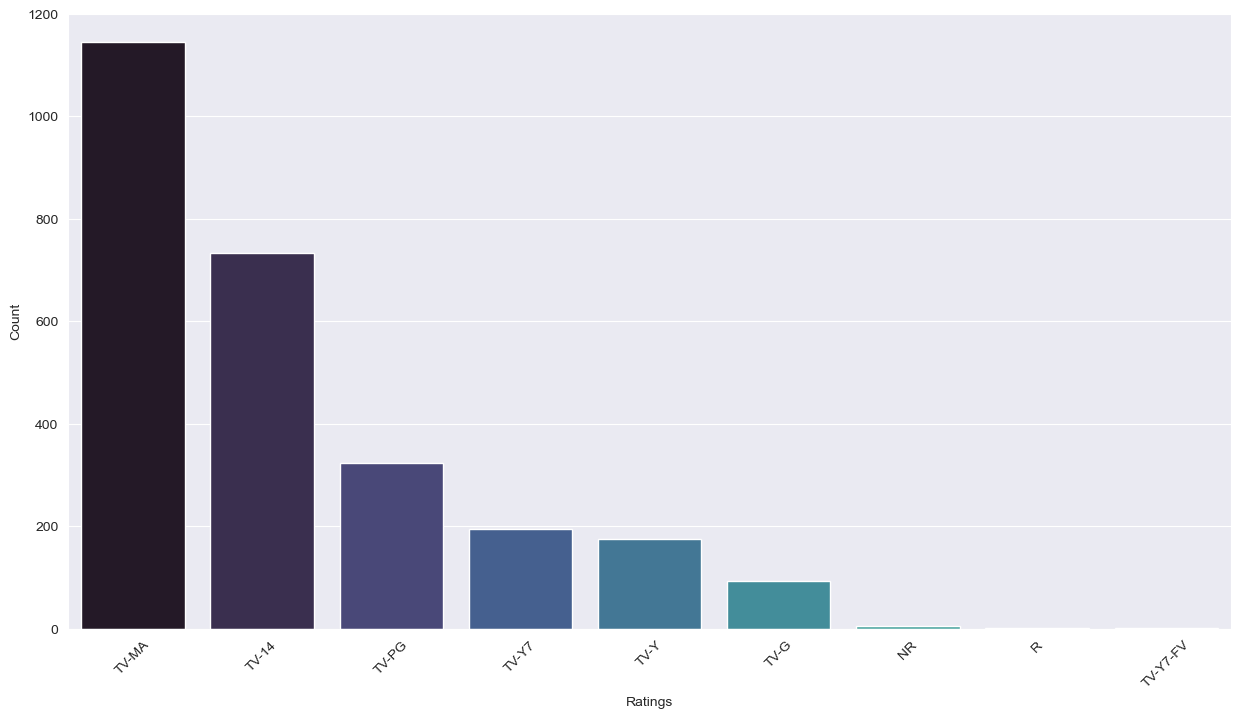

In [41]:
# Ratings show analysis
plt.figure(figsize=(15,8), dpi = 100)
sns.countplot(x='rating', data=n_shows, palette='mako', order=n_shows['rating'].value_counts().index[0:10],)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

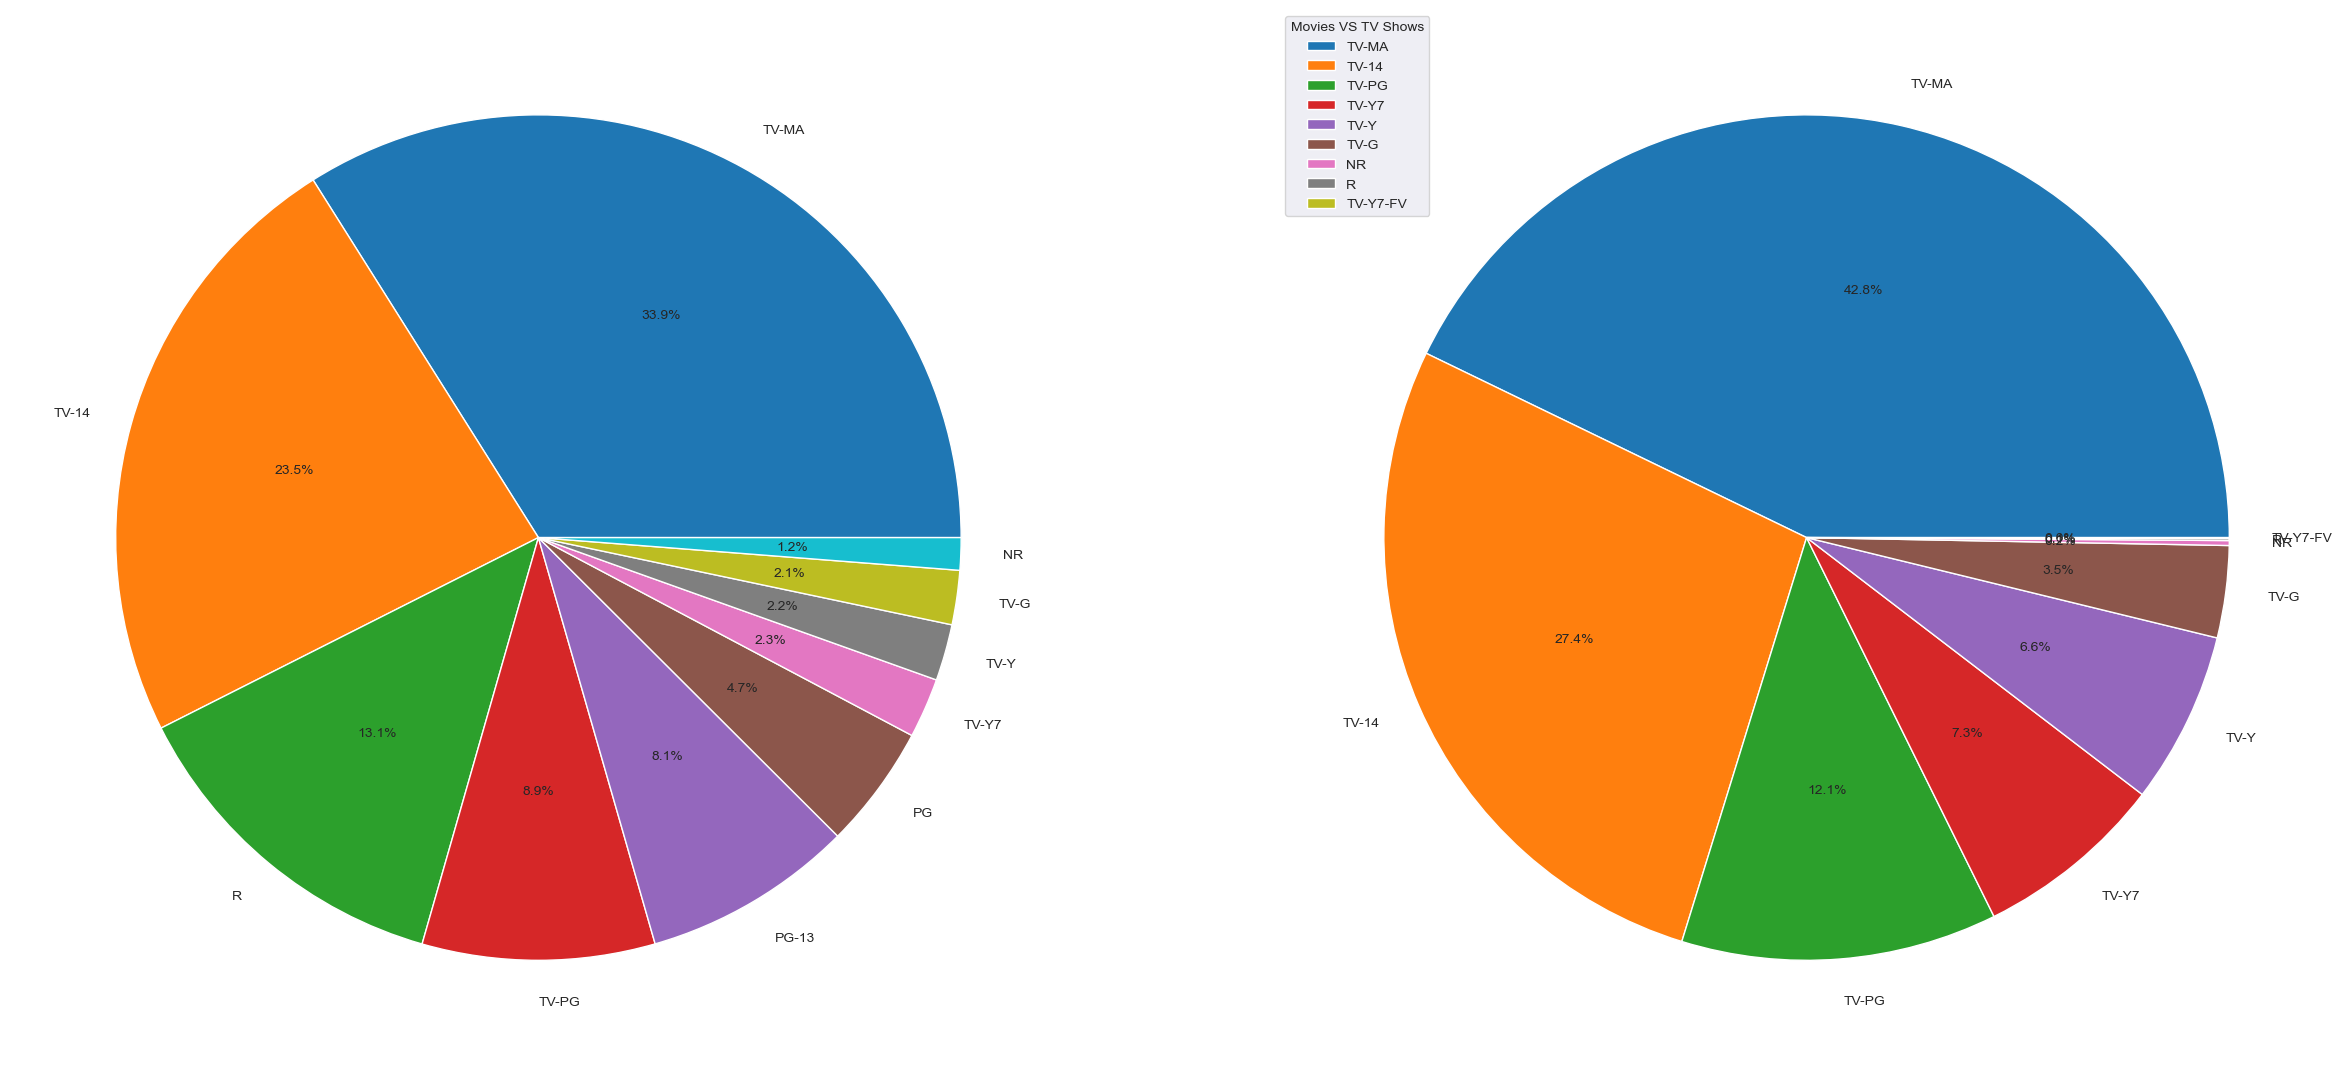

In [42]:
# Movies vs Tv Shows
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,18))
np_movies = n_movies['rating'].value_counts().head(10)
np_shows = n_shows['rating'].value_counts().head(10)
ax1.pie(x=np_movies, labels=np_movies.index, autopct='%1.1f%%')
ax2.pie(x=np_shows, labels=np_shows.index, autopct='%1.1f%%')
plt.legend(loc='upper left', title='Movies VS TV Shows')
plt.show()

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


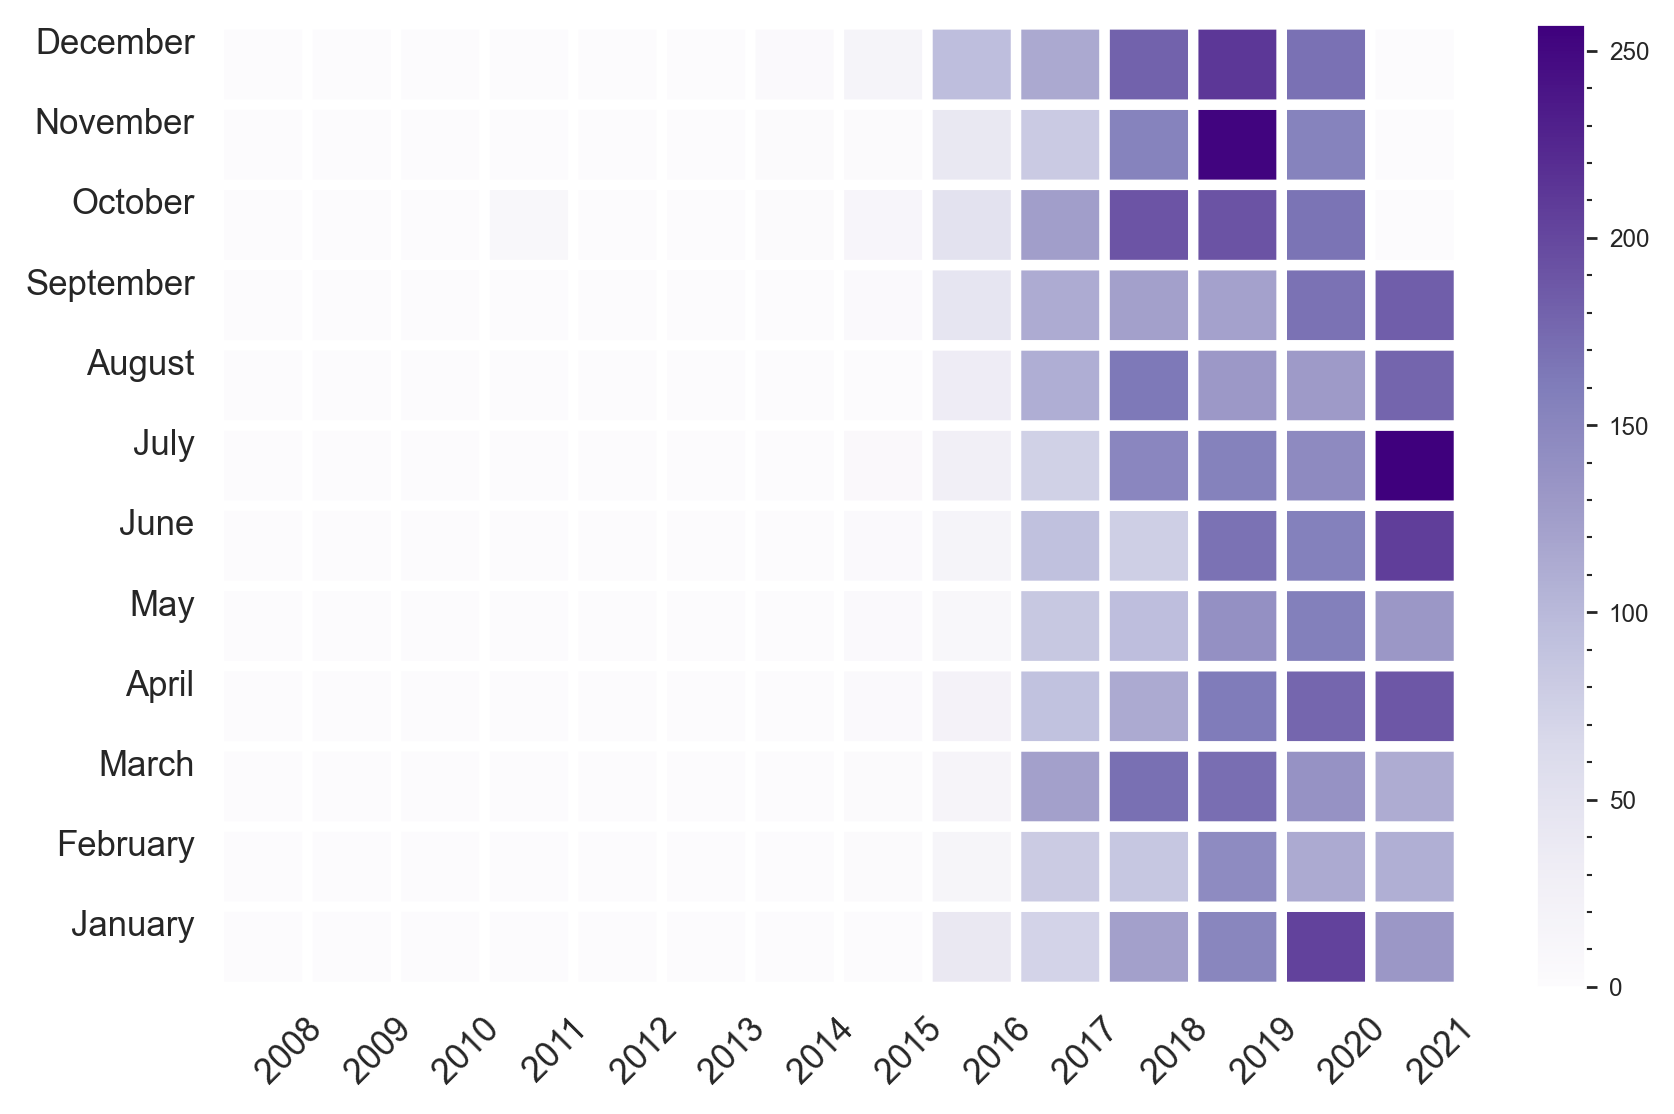

In [63]:
# Months when movie not released
import numpy as np
n_date = df[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x: x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x: x.split(' ')[0])
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
g_df = n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_list].T
plt.figure(figsize=(8,5), dpi=250)
plt.pcolor(g_df, cmap='Purples', edgecolor='white', linewidths=3)
plt.xticks(np.arange(0.8, len(g_df.columns), 1), g_df.columns, rotation=45)
plt.yticks(np.arange(0.8, len(g_df.index), 1), g_df.index, rotation=0)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=7)
cbar.minorticks_on()
plt.show()

In [60]:
n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_list].T

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,41.0,72.0,123.0,151.0,204.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,15.0,81.0,86.0,145.0,114.0,109.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.0,123.0,170.0,171.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,21.0,91.0,114.0,161.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,11.0,85.0,95.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,92.0,77.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,75.0,150.0,155.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,110.0,163.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,46.0,113.0,123.0,122.0,168.0,183.0


In [64]:
from collections import Counter

# Which country produces the most content
n_country = df['country'].dropna()
nc_country = pd.Series(dict(Counter(','.join(n_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
nc_country[:15]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
dtype: int64

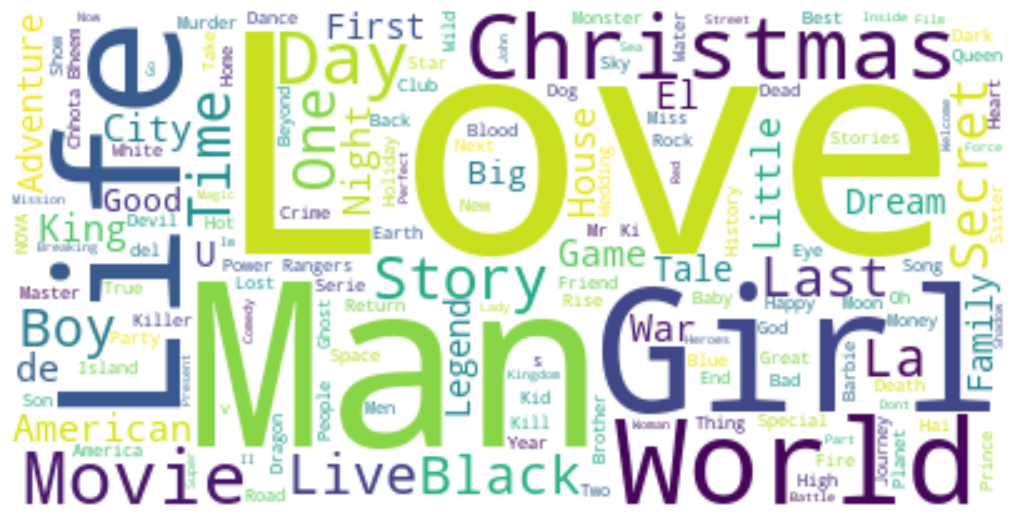

In [74]:
# Word Cloud Titles
from wordcloud import WordCloud
t = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color='white', max_words=150).generate(t)
plt.figure(figsize=(10,8), dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

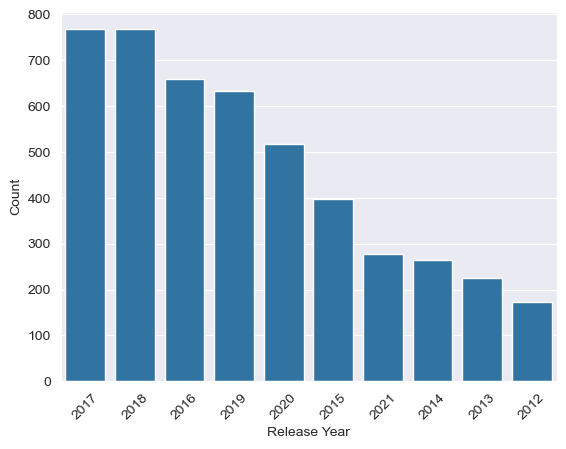

In [82]:
# Number of release movie by year
sns.countplot(x='release_year', data=n_movies ,order=n_movies['release_year'].value_counts().index[0:10])
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()